In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline
from timeit import default_timer as timer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc

## Pima Indians Diabetes dataset

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


This is a Kaggle dataset. The objective of the homework is to compare XGBoost, CatBoost and lightGBM models to analyze the dataset. 

https://www.kaggle.com/uciml/pima-indians-diabetes-database

From the Kaggle web page:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Reference**: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Homework Assssignment

Due 11/19 10am

**Make sure all of your output is shown.**

Name your submission rcsid_HW2.ipynb

The assignment is to build and compare XGBoost, CatBoost and lightGBM models to accurately predict whether or not the patients in the dataset have diabetes or not. 

On Kaggle there are  over 1800 code submissions using a variety of ML algorithms which you are free to look at. Any ideas you use from the submissions you should provide the link to. Many of the submissions on Kaggle achieved a predictive accuracy of 77-79. Can you do better?

The homework has 5 sections:

1. Exploratory Data Analysis and Data Preprocessing (20 points).

2. XGBoost model (25 points)

3. CatBoost model (25 points)

4. LightGBM model (20 points)

5. Summary (10 points)

### 1. Exploratory Data Analysis and Data Preprocessing

This section should contain the descriptive statistics, visualizations, and the data preprocessing you think is necessary. It should contain any missing value processing or other changes to the feature values that you would result in more accurate predictions.

It should contain text interpretations of the statistics and visualizations. It should also contain splitting the data into training and test sets. This is an unbalanced dataset so you should have code that show that the class proportions are the same for all the data, the training data and the test data.

You should also think about what variables are categorical and how to handle them in each of the three models.


##### The brief description of the variables:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

##### Check for missing values

In [5]:
np.sum(diabetes.isnull())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Descriptive statistics

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##### Visualize the data

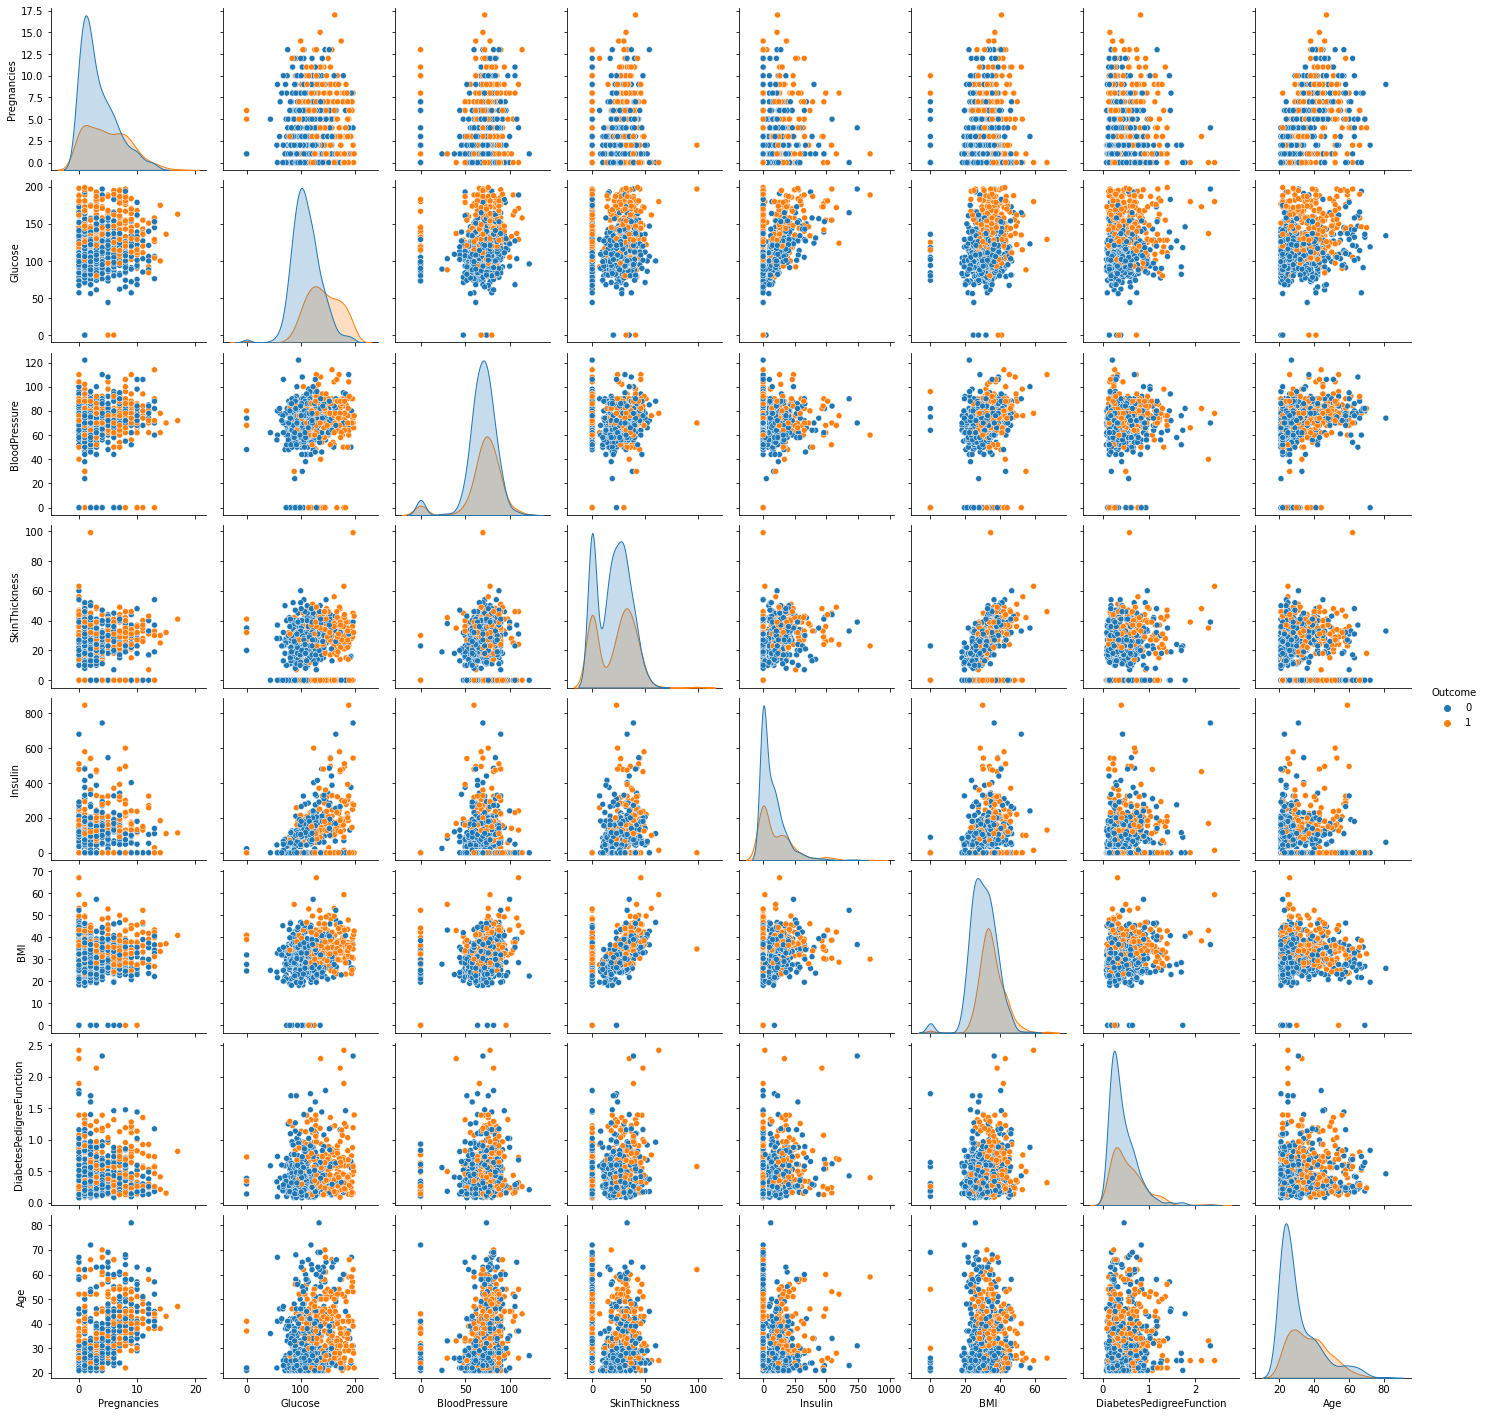

In [8]:
sns.pairplot(diabetes, diag_kind='kde', hue='Outcome')

##### Visualize Descriptive Statistics

##### Summaray

From above data, the glucose is the most influential factor with diabetes' outcome, then pregnancies.
However, the data is obviously unbalanced, 0 is greatly more than 1 in outcome. 
We can easily see that in pairplots and describe data.
That is why we need to pay attension in our train_test_split.
Some people also don't have 0 on some data. we need to adjust our data.

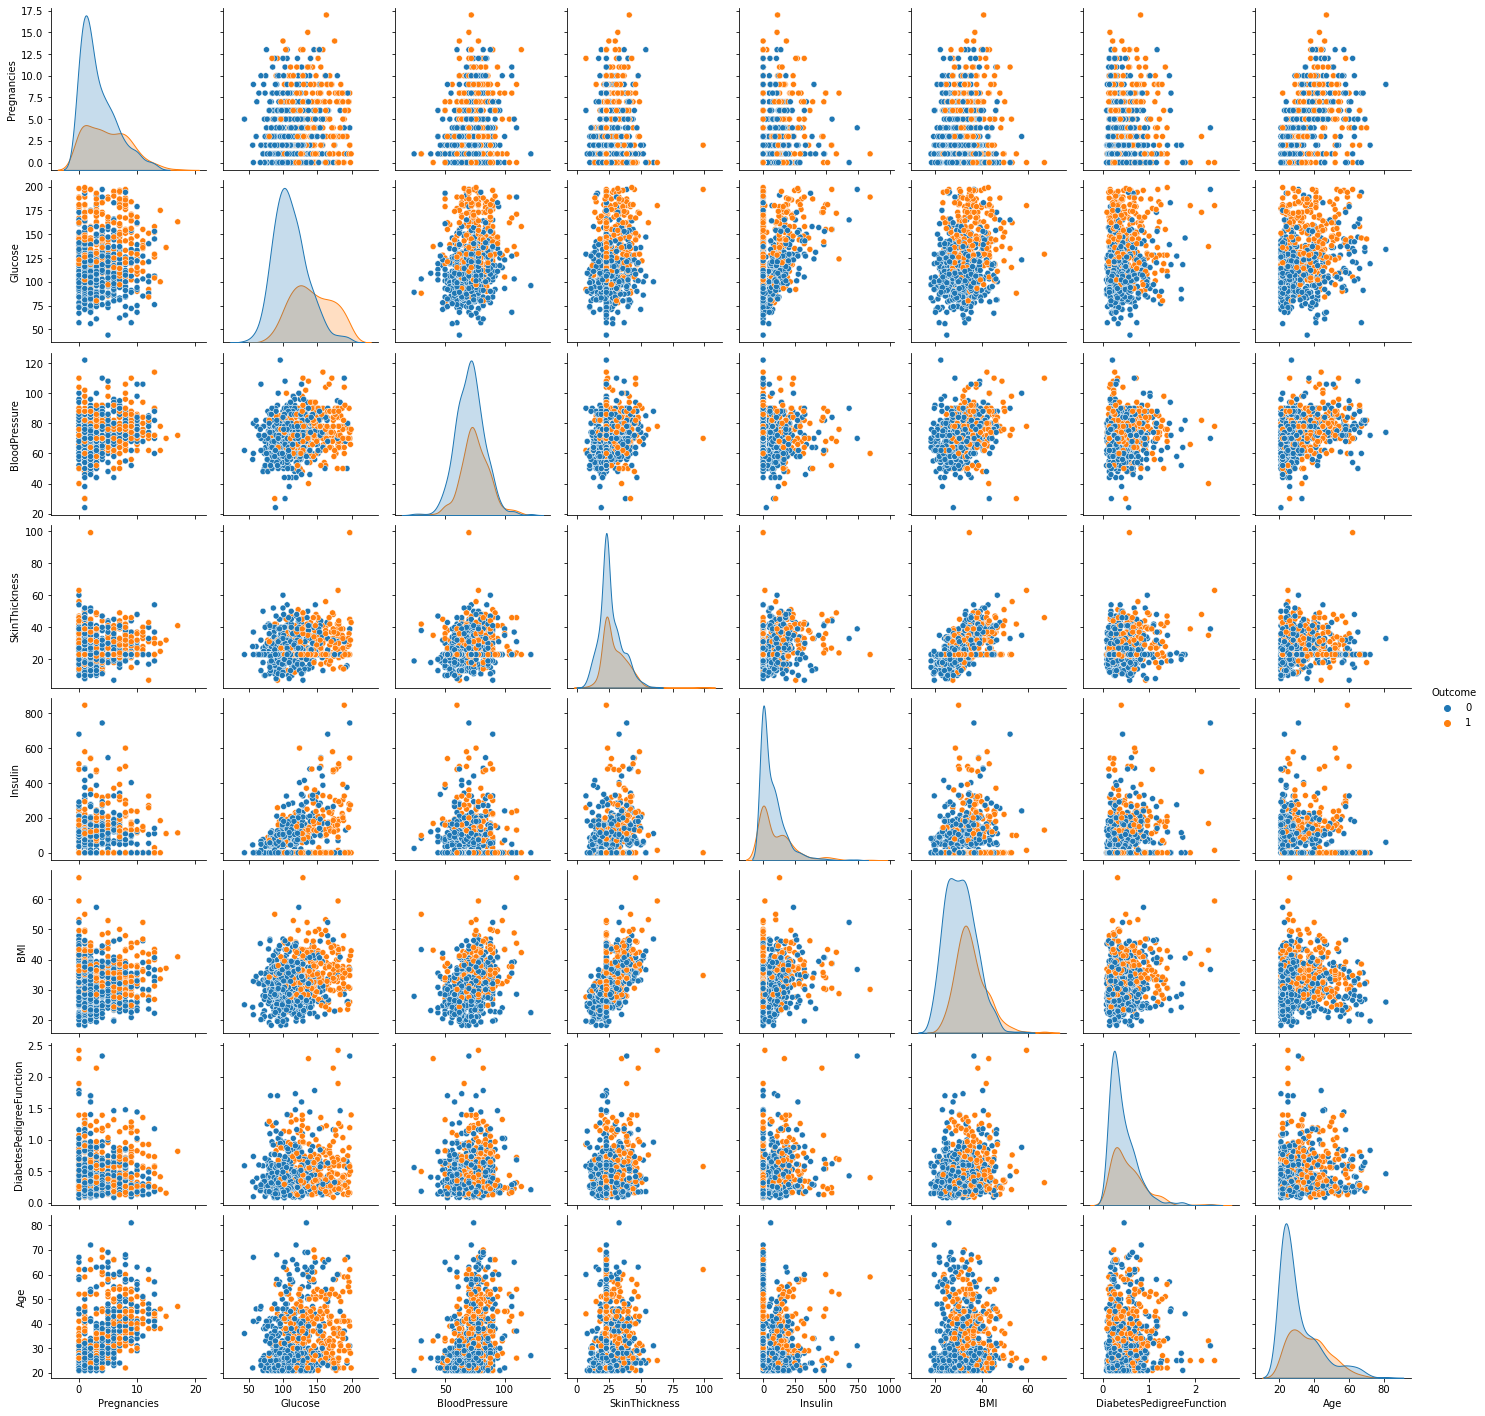

In [9]:
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].median())
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].median())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median())
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].median())
sns.pairplot(diabetes, diag_kind='kde', hue='Outcome')

In [10]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.331709,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
Insulin,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231400,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


##### Split them into train_test

In [11]:
X = diabetes.iloc[:, :8]
y = diabetes.iloc[:, 8]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(768, 8) (768,)


((614, 8), (154, 8), (614,), (154,))

##### scale the variables or statement

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 2. XGBoost Model

This section should contain at a minimum:

1. A Classifier (using the defaults or a subset that you choose) with test set predictions, confusion matrix, accuracy, precision and recall scores and sorted list of features importances
2. A Cross Validation using 'error' as the evaluation metric. Compute the accuracy by 1-test-error-mean.
3. A Grid Search with display of best score and best parameters. Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).
4. A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy,precision and recall scores, feature importance plot and SHAP summary plot. (Hint: use SHAP tree explainer)

##### 1. A Classifier (using the defaults or a subset that you choose) with test set predictions, confusion matrix, accuracy, precision and recall scores and sorted list of features importances

In [15]:
import xgboost as xgb
model = xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)

Confusion Matrix for Test Data:
[[85 15]
 [24 30]]


In [16]:
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,3))

Glucose 	 0.252
BMI 	 0.142
Age 	 0.136
Insulin 	 0.122
DiabetesPedigreeFunction 	 0.098
Pregnancies 	 0.091
BloodPressure 	 0.081
SkinThickness 	 0.077


In [17]:
def accuracy(cm):
    return np.trace(cm) / np.sum(cm)
print('Accuracy: ')
accuracy(cm)

Accuracy: 


0.7467532467532467

In [18]:
def precision(cm):
    return cm[1, 1]/(cm[1, 1] + cm[0, 1])
print('Precision: ')
precision(cm)

Precision: 


0.6666666666666666

In [19]:
def recall(cm):
    return cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("recall: ")
recall(cm)

recall: 


0.5555555555555556

##### 2. A Cross Validation using 'error' as the evaluation metric. Compute the accuracy by 1-test-error-mean.

    train-error-mean  train-error-std  test-error-mean  test-error-std
33          0.206037         0.010252         0.263845        0.019924
34          0.206037         0.010252         0.260577        0.020315
35          0.204409         0.011191         0.258943        0.020895
36          0.205224         0.011320         0.258943        0.020895
37          0.206852         0.010457         0.255683        0.019423


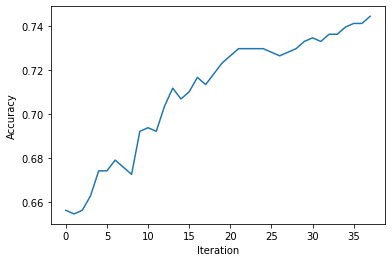

In [20]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

params = {'eval_metric' : 'error',  'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="error", as_pandas=True, seed=123)
print(cv_results.tail())

plt.plot(1 - cv_results['test-error-mean'], label = "accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

##### 3. A Grid Search with display of best score and best parameters. Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).

In [21]:
starttime = timer()
model = xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False)
gs_params = {'max_depth': range (2, 10, 1),
             'n_estimators': range(60, 220, 40),
             'learning_rate': [0.1, 0.01, 0.05]}

grid_search = GridSearchCV(
    model, param_grid= gs_params, cv=5, verbose=True, n_jobs=-1,scoring='r2')

grid_search.fit(X_train, y_train)

print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_ )
print("Time: ", timer() - starttime)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best score:  -0.025717054263565964
Best parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 140}
Time:  33.83764550000001


##### 4. A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy,precision and recall scores, feature importance plot and SHAP summary plot. (Hint: use SHAP tree explainer)

Confusion Matrix for Test Data:
[[83 17]
 [23 31]]
Accuracy:  0.7402597402597403
Precision:  0.6458333333333334
Recall:  0.5740740740740741
----------------------------------------
Feature importance: 
Glucose 	 0.327
Insulin 	 0.147
Age 	 0.132
BMI 	 0.123
DiabetesPedigreeFunction 	 0.082
SkinThickness 	 0.065
Pregnancies 	 0.064
BloodPressure 	 0.06


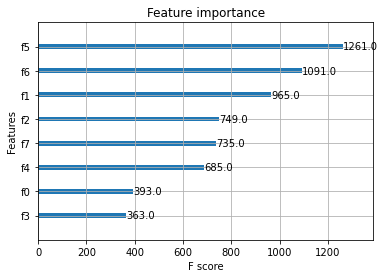

In [22]:
best_parameters = grid_search.best_params_
model = xgb.XGBClassifier(eval_metric='logloss',use_label_encoder=False,
                         n_estimators = best_parameters['n_estimators'],
                         max_depth = best_parameters['max_depth'],
                         learning_rate = best_parameters['learning_rate'])
model.fit(X_train, y_train)
yhat = model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
print("Confusion Matrix for Test Data:")
print(cm)
print("Accuracy: ", accuracy(cm))

print('Precision: ', precision(cm))
print('Recall: ', recall(cm))
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
print('-' * 40)
print('Feature importance: ')
for val,feat in pairs:
    print(feat,'\t',round(val,3))
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [7,7]

In [32]:
import numpy
print(numpy.__version__)
import shap
Xd = xgb.DMatrix(X, label=y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
shap.summary_plot(shap_values, X)
print(X.tail())

1.21.4


ImportError: Numba needs NumPy 1.20 or less

### 3. CatBoost Model

This section should contain at a minimum:

1. Pool objects for training and testsets
2. A Classifier (using the defaults or a subset that you choose)  with test set predictions, confusion matrix, accuracy, precision and recall scores and data frame of features importances
3. A Cross Validation using early stopping and plot = True. Use custom_loss for Area under the Curve and Accuracy. Show the plot for AUC.
4. A Grid Search with display of best score and best parameters. Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).
5. A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy, precision and recall scores, feature importance plot , ROC plot and SHAP summary plot.

##### 1. Pool objects for training and testsets

In [21]:
import catboost
from catboost import CatBoostClassifier
from catboost import Pool
from catboost import MetricVisualizer
from catboost import cv

train_pool = Pool(
    data=X_train, 
    label=y_train 
)

validation_pool = Pool(
    data=X_test,
    label=y_test
)

##### 2. A Classifier (using the defaults or a subset that you choose)  with test set predictions, confusion matrix, accuracy, precision and recall scores and data frame of features importances

In [22]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    #custom_loss=['AUC', 'Accuracy'],
    #loss_function='CrossEntropy'
)
model.fit(train_pool, eval_set=validation_pool, verbose=100,plot=True)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)
print('Accuracy: ')
print(accuracy(cm))
print('Precision: ')
print(precision(cm))
print("recall: ")
print(recall(cm))
print('-'*40)
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,3))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6426535	test: 0.6395892	best: 0.6395892 (0)	total: 138ms	remaining: 27.4s
100:	learn: 0.1679154	test: 0.5284447	best: 0.4727976 (20)	total: 311ms	remaining: 305ms
199:	learn: 0.0776614	test: 0.5923957	best: 0.4727976 (20)	total: 484ms	remaining: 0us

bestTest = 0.4727975625
bestIteration = 20

Shrink model to first 21 iterations.
Confusion Matrix for Test Data:
[[88 12]
 [22 32]]
Accuracy: 
0.7792207792207793
Precision: 
0.7272727272727273
recall: 
0.5925925925925926
----------------------------------------
Glucose 	 34.499
BMI 	 19.112
Age 	 11.842
DiabetesPedigreeFunction 	 9.071
Insulin 	 8.603
Pregnancies 	 8.202
SkinThickness 	 5.164
BloodPressure 	 3.507


##### 3. A Cross Validation using early stopping and plot = True. Use custom_loss for Area under the Curve and Accuracy. Show the plot for AUC.

In [23]:
params = {
    'loss_function': 'Logloss',
    'iterations': 80,
    'custom_loss': 'AUC',
    'learning_rate': 0.5,
    'early_stopping_rounds': 20
}

cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)


#### 4. A Grid Search with display of best score and best parameters. Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).

In [24]:
starttime = timer()
param_grid = {
    "learning_rate": [0.001, 0.01, 0.5],
    "iterations": [10, 20, 30, 40]
}
clf = CatBoostClassifier(
    iterations=20, 
    verbose=False
)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
results = grid_search.fit(X_train, y_train)
print(results.best_estimator_.get_params())
print('best score: ',results.best_score_)
print('Time: ', timer() - starttime)

{'iterations': 30, 'learning_rate': 0.5, 'verbose': False}
best score:  0.7720229555236728
Time:  2.5506406000000084


##### 5.A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy, precision and recall scores, feature importance plot , ROC plot and SHAP summary plot.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Confusion Matrix for Test Data:
[[90 10]
 [23 31]]
Accuracy: 
0.7857142857142857
Precision: 
0.7560975609756098
recall: 
0.5740740740740741
----------------------------------------
Glucose 	 34.251
BMI 	 14.615
Age 	 13.454
DiabetesPedigreeFunction 	 10.159
BloodPressure 	 8.944
Pregnancies 	 8.156
Insulin 	 6.657
SkinThickness 	 3.765


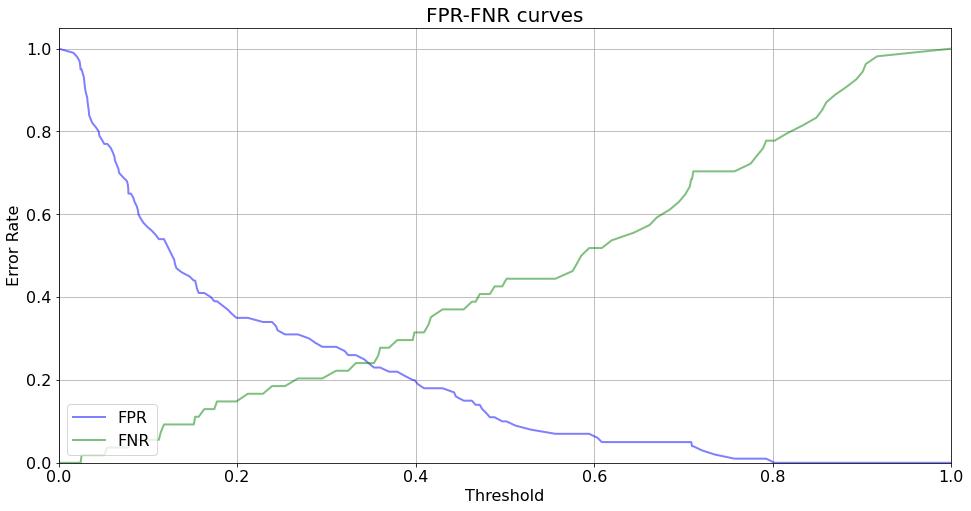

In [25]:
model = CatBoostClassifier(
    iterations=results.best_estimator_.get_params()['iterations'],
    learning_rate=results.best_estimator_.get_params()['learning_rate']
    #custom_loss=['AUC', 'Accuracy'],
    #loss_function='CrossEntropy'
)
model.fit(train_pool, eval_set=validation_pool, verbose=results.best_estimator_.get_params()['verbose'],plot=True)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)
print('Accuracy: ')
print(accuracy(cm))
print('Precision: ')
print(precision(cm))
print("recall: ")
print(recall(cm))
print('-'*40)
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,3))

from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model, validation_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)
plt.figure(figsize=(16, 8))
style = {'alpha':0.5, 'lw':2}

plt.plot(thresholds, fpr, color='blue', label='FPR', **style)
plt.plot(thresholds, fnr, color='green', label='FNR', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16);
plt.show()

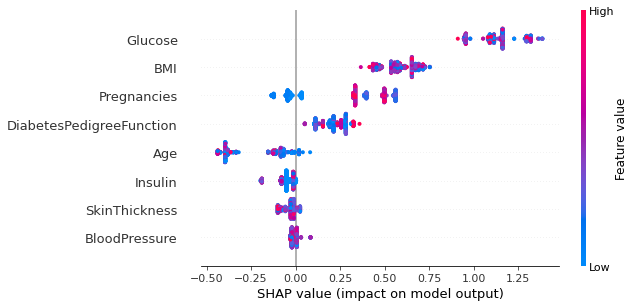

In [26]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

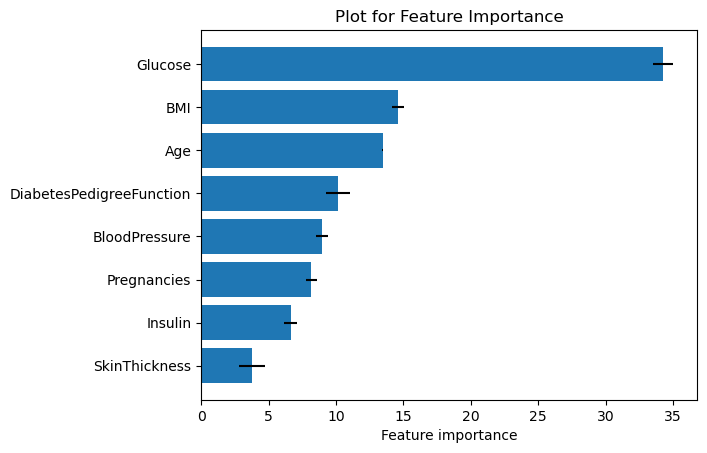

In [27]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(feats))
performance = 3 + 10 * np.random.rand(len(feats))
error = np.random.rand(len(feats))

sort_feats = []
sort_vals = []
for pair in pairs:
    sort_feats.append(pair[1])
    sort_vals.append(pair[0])

ax.barh(y_pos, np.array(sort_vals), xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(sort_feats)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature importance')
ax.set_title('Plot for Feature Importance')

plt.show()

### 4. LightGBM

This section should contain at a minimum:

1. A Classifier (using the defaults or a subset that you choose) with test set predictions, confusion matrix, accuracy,precision and recall scores and sorted list of features importances.
2. A Grid Search with display of best score and best parameters.  Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).
3. A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy, precision and recall scores, training and test metric plot, a feature importance plot and a SHAP summary plot.

##### 1. A Classifier (using the defaults or a subset that you choose) with test set predictions, confusion matrix, accuracy,precision and recall scores and sorted list of features importances.

In [28]:
import lightgbm as gbm
model = gbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)
print('Accuracy: ')
print(accuracy(cm))
print('Precision: ')
print(precision(cm))
print("recall: ")
print(recall(cm))
print('-'*40)
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,3))

[20]	training's binary_logloss: 0.331407	valid_0's binary_logloss: 0.486985
[40]	training's binary_logloss: 0.214371	valid_0's binary_logloss: 0.521256
[60]	training's binary_logloss: 0.140443	valid_0's binary_logloss: 0.578942
[80]	training's binary_logloss: 0.096824	valid_0's binary_logloss: 0.621942
[100]	training's binary_logloss: 0.0666983	valid_0's binary_logloss: 0.667453
Confusion Matrix for Test Data:
[[81 19]
 [25 29]]
Accuracy: 
0.7142857142857143
Precision: 
0.6041666666666666
recall: 
0.5370370370370371
----------------------------------------
Glucose 	 462
DiabetesPedigreeFunction 	 447
BMI 	 411
BloodPressure 	 283
Age 	 278
Pregnancies 	 204
Insulin 	 200
SkinThickness 	 163


##### 2. A Grid Search with display of best score and best parameters.  Use the timer() function to time how long the grid search fit method takes (i.e. print end time - start time).

In [29]:
starttime = timer()
model = gbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
param_grid = {
    "learning_rate": [0.001, 0.01, 0.5],
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40)
}
grid_search = GridSearchCV(
    model, param_grid= param_grid, cv=5, verbose=True, n_jobs=-1,scoring='r2')
results = grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_ )
print('Time: ', timer() - starttime)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best score:  -0.010971760797342255
Best parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 180}
Time:  21.448533400000002


##### 3. A final Classifier using the best parameters from 3 with test set predictions, confusion matrix, accuracy, precision and recall scores, training and test metric plot, a feature importance plot and a SHAP summary plot.

[20]	training's binary_logloss: 0.581057	valid_0's binary_logloss: 0.588876
[40]	training's binary_logloss: 0.534051	valid_0's binary_logloss: 0.551808
[60]	training's binary_logloss: 0.499393	valid_0's binary_logloss: 0.528001
[80]	training's binary_logloss: 0.473222	valid_0's binary_logloss: 0.509351
[100]	training's binary_logloss: 0.451814	valid_0's binary_logloss: 0.499127
Confusion Matrix for Test Data:
[[91  9]
 [32 22]]
Accuracy: 
0.7337662337662337
Precision: 
0.7096774193548387
recall: 
0.4074074074074074
----------------------------------------
Glucose 	 325
BMI 	 243
DiabetesPedigreeFunction 	 168
Age 	 143
Insulin 	 101
Pregnancies 	 95
BloodPressure 	 75
SkinThickness 	 65


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

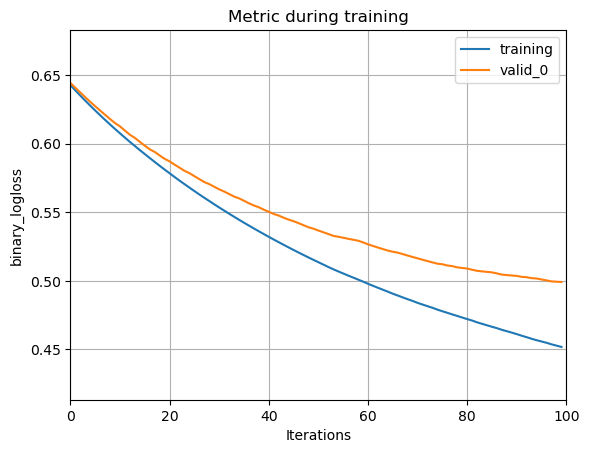

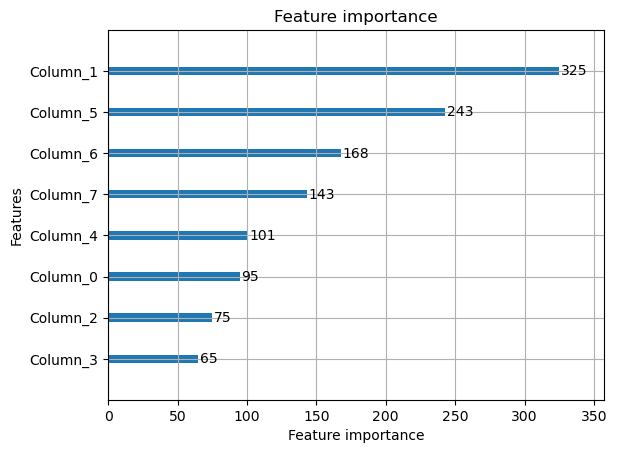

In [30]:
model = gbm.LGBMClassifier(learning_rate = grid_search.best_params_['learning_rate'],
                          max_depth = grid_search.best_params_['max_depth'],
                          random_state = 42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)
print('Accuracy: ')
print(accuracy(cm))
print('Precision: ')
print(precision(cm))
print("recall: ")
print(recall(cm))
print('-'*40)
feats = diabetes.columns.tolist()[0:-1]
vals = model.feature_importances_
pairs = [(vals[i], feats[i]) for i in range(len(feats))]
pairs.sort(reverse=True)
for val,feat in pairs:
    print(feat,'\t',round(val,3))
    
gbm.plot_metric(model)
gbm.plot_importance(model)

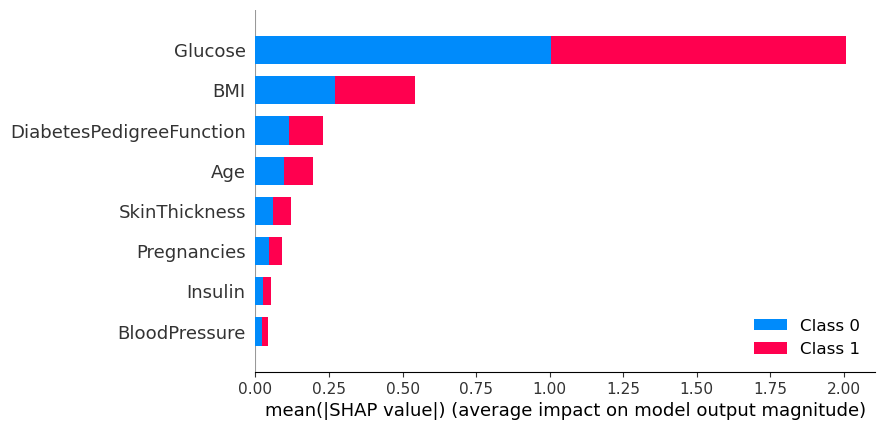

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

### 5. Summary

Summarize the results for the three model. At a minimum, discuss and show which default model was the most accurate,  which final model was most accurate, which had the best recall and precision.

Discuss and show differences of the models in terms of feature importance. Summarize the difference in SHAP results?

 Which model was easiest to understand? Which was the easiest to code?

Discuss anything else you think is relevant.

1. In my results, catboost has the highest accuracy value, which is about 0.7792207792207793. Catboost's recall is the highest, which is 0.5925925925925926. For precision, Catboost has the highest precision than other two, which is 0.7272727272727273. In default model, Catboost seems the best model.



2. In my final data after utilizing grid search to optimize, catboost is the best model. All shaps indicates glucose is the most influential factor for diabetes. The catboost indicates pregency is also the important factor, but other twos are not. This is the big difference in these three shap results. Also, xgboost indicates blood pressure is one of the importance factor in this. However, for the other two, blood pressure is the least feature to effect diabetes.

3. xgboost is the easiest to code and understand, for other two, we need to set many parameters, which is inconvenient for code. 

4. From my point of view, generally three models points the most important thing: Glucose is the most effective factor in diabetes. Compare to glucose, other factors only have little results even though exists some small diffence due to calculation ways. Also, I think recall would be more important than our precision and accuracy. Since diabetes is one of the most influential diseases for humans, we need to make sure more people who get diabetes can be treated even though someone does not get this diseases but also evaluated as diseases. In other words, for some people who get diabetes but they are evaluated as healthy, they may miss the best time to be saved.